# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Files

In [2]:
Games = pd.read_csv("Clean_Data/Games.csv")
Reviews = pd.read_csv("Clean_Data/Reviews.csv")
Items = pd.read_parquet("Clean_Data/Items.parquet")

# Functions

In [5]:
from textblob import TextBlob

# Sentiment Analysis
def sentiment_analysis(x):
    analysis = TextBlob(x)

    sentiment = analysis.sentiment.polarity

    if sentiment > 0.1:
        return 2
    elif sentiment < -0.1:
        return 0
    else:
        return 1

# This function calculates the percentage of null values respect its own column
def null_ratio(Dataset):
    null_ratio = ((Dataset.isnull().sum() / len(Dataset))*100).sort_values(ascending=False)
    return null_ratio

def points(x):
    if x == 0:
            return "Bad"
    if x == 1:
        return "Neutro"
    if x == 2: 
        return "Good"

# Games

In [4]:
# We see the rows and columns of our dataset
Games.shape

(32133, 10)

In [5]:
# We see if we have null values
Games.isnull().sum()

publisher       19
genres           0
app_name         0
title            0
release_date     0
tags             0
price            0
early_access     0
developer        0
release_year     0
dtype: int64

In [6]:
# We fill null values with 'No data' and we use inplace=True to keep changes
Games.fillna('No data', inplace=True)

In [7]:
# We see the percentage of null respect its columns
null_ratio(Games)

publisher       0.0
genres          0.0
app_name        0.0
title           0.0
release_date    0.0
tags            0.0
price           0.0
early_access    0.0
developer       0.0
release_year    0.0
dtype: float64

In [8]:
# We count games per year
Games_Year = Games['release_year'].value_counts()
Games_Year.sort_values(ascending=False)

Games_Year

release_year
2017.0     9559
2016.0     6942
2015.0     4952
2014.0     2844
No data    2241
2013.0     1552
2012.0     1192
2011.0      590
2010.0      442
2009.0      341
2008.0      213
2007.0      167
2006.0      155
2018.0      123
2005.0      102
2003.0       84
2004.0       79
2001.0       69
1998.0       61
1999.0       55
2002.0       50
1997.0       42
2000.0       40
1996.0       39
1994.0       36
1993.0       34
1995.0       33
1991.0       16
1992.0       15
1990.0       12
1989.0       10
1987.0        9
1988.0        7
1984.0        4
1983.0        4
2019.0        4
1985.0        3
1982.0        3
1981.0        3
1970.0        2
1986.0        1
2021.0        1
1975.0        1
1980.0        1
Name: count, dtype: int64

In [9]:
# We see the quantity of games per genre
Games['genres'].value_counts()

genres
Action                       11316
Casual                        4340
Adventure                     4328
Indie                         3299
No data                       3283
Simulation                    1852
Strategy                      1143
RPG                            685
Free to Play                   523
Racing                         454
Design &amp; Illustration      327
Animation &amp; Modeling       179
Utilities                       93
Audio Production                84
Sports                          63
Massively Multiplayer           49
Education                       46
Video Production                21
Software Training               21
Web Publishing                   8
Photo Editing                    8
Accounting                       7
Early Access                     4
Name: count, dtype: int64

C:\Users\Jhon\AppData\Local\Temp\ipykernel_12540\2222708938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Games, y='genres', orient='h', palette=("cubehelix"))


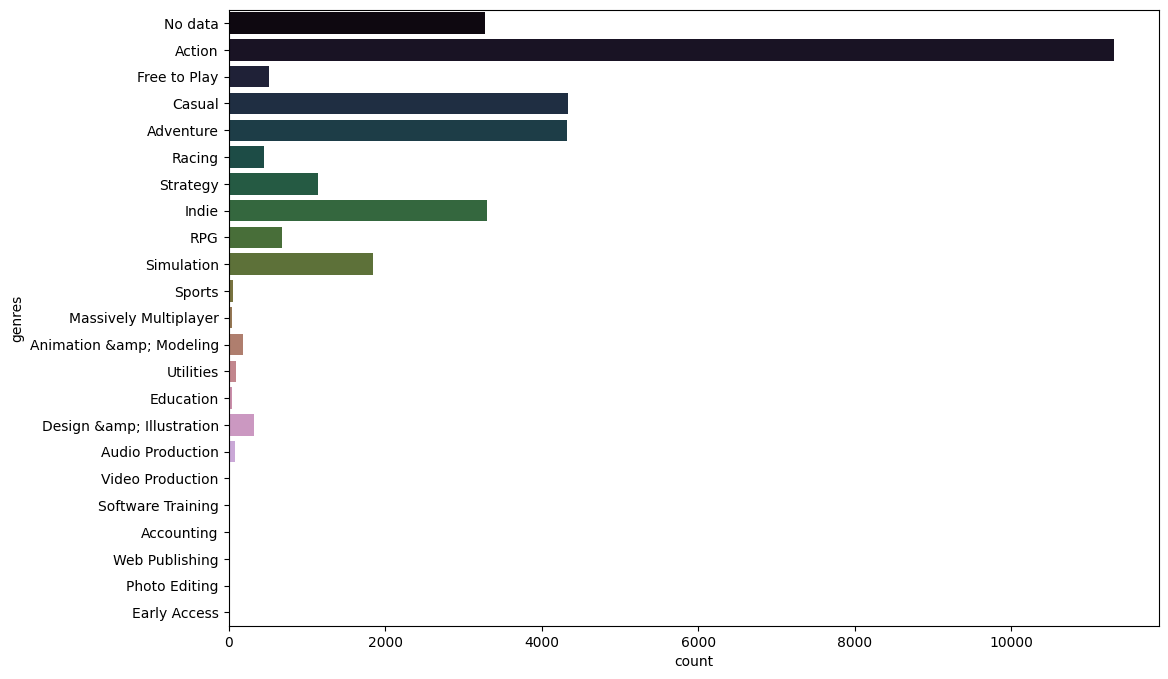

In [10]:
# Now, we plot it to see the genre with most games

plt.figure(figsize=(12, 8))
sns.countplot(data=Games, y='genres', orient='h', palette=("cubehelix"))
plt.show()

In [11]:
# We see unique games
unique_games = len(Games['title'].unique())
unique_games

30055

### Calculating Outliers with interquantile range

75% - 25% values in dataset

In [29]:
# We calculate first quantile and third quantile

quantile1, quantile3 = np.percentile(Games['price'], [25,75])
print(quantile1, quantile3)

1.99 9.99


In [30]:
# Finding interquantile range
iqr = quantile3-quantile1
print(iqr)

8.0


In [31]:
# Finding lower and upper bound
lower_bound = quantile1 - (1.5 * iqr)
upper_bound = quantile3 + (1.5 * iqr)

print(lower_bound, upper_bound)

-10.01 21.990000000000002


In [34]:
# We see min and max values in our column
print(Games['price'].min())
print(Games['price'].max())

0.0
995.0


In [46]:
# Now, we're going to see the games that are outliers, and how many there are
outlier = Games[Games['price'] > upper_bound]['title']
print(outlier)
print('\n', outlier.count())

9            SNOW - All Access Legend Pass
19                    SNOW - Lifetime Pack
52                                 No data
60                    RACE - The WTCC Game
234                     Guild Wars Trilogy
                       ...                
31936                                愛神餐館2
31954                              No data
31957    CarX Drift Racing Online - Deluxe
32068                            Mesozoica
32096            CyberLink YouCam 7 Deluxe
Name: title, Length: 1873, dtype: object

 1873


In [49]:
# Let's see more of them
for game in outlier:
    print(game)

SNOW - All Access Legend Pass
SNOW - Lifetime Pack
No data
RACE - The WTCC Game
Guild Wars Trilogy
Train Simulator: Colton &amp; Northern Route Add-On
SEGA Mega Drive and Genesis Classics
Mafia II
Sid Meier's Civilization® V
Call of Duty®: Black Ops
Warhammer 40,000: Dawn of War II: Retribution
Frozen Synapse
Warhammer 40,000: Space Marine
Call of Duty®: Modern Warfare® 3
Crusader Kings II
Total War: Shogun 2 - Fall of the Samurai
Resident Evil: Operation Raccoon City
Dungeons &amp; Dragons Online® Menace of the Underdark™
Spiral Knights: Guardians Armor Pack
Sleeping Dogs
Gotham City Impostors Free to Play: Ultimate Impostor Kit
Carrier Command: Gaea Mission
3D-Coat V4.8
Rocksmith™
APB Reloaded Urban Survival Pack
Call of Duty®: Black Ops II
Painkiller Hell &amp; Damnation: Satan Claus DLC
DmC: Devil May Cry
3DMark
Omerta - City of Gangsters - The Bulgarian Colossus DLC
RPG Maker VX Ace - High Fantasy 2 Resource Pack
Train Simulator: Western Lines of Scotland Route Add-On
Resident Evi

# Reviews

In [6]:
# We see if there are some null values
Reviews.isnull().sum()

user_id            0
user_url           0
funny          51133
item_id            0
helpful            0
recommend          0
review            30
posted_date        0
posted_year        0
dtype: int64

In [7]:
# Well, we saw that there are values, let's see its percentage respect columns
nulls = null_ratio(Reviews)
nulls

funny          86.261113
review          0.050610
user_id         0.000000
user_url        0.000000
item_id         0.000000
helpful         0.000000
recommend       0.000000
posted_date     0.000000
posted_year     0.000000
dtype: float64

In [8]:
# We see the column 'funny'
Reviews['funny']

0                                     NaN
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
                       ...               
59272                                 NaN
59273                                 NaN
59274    1 person found this review funny
59275                                 NaN
59276                                 NaN
Name: funny, Length: 59277, dtype: object

In [9]:
# We see the column 'review'
Reviews['review']

0        Simple yet with great replayability. In my opi...
1                     It's unique and worth a playthrough.
2        Great atmosphere. The gunplay can be a bit chu...
3        I know what you think when you see this title ...
4        For a simple (it's actually not all that simpl...
                               ...                        
59272    a must have classic from steam definitely wort...
59273    this game is a perfect remake of the original ...
59274    had so much fun plaing this and collecting res...
59275                                                   :D
59276                                       so much fun :D
Name: review, Length: 59277, dtype: object

In [10]:
# We fill the missing data with 'No data'
Reviews.fillna("No data", inplace=True)

In [11]:
# Now we have no more null values
null_ratio(Reviews)

user_id        0.0
user_url       0.0
funny          0.0
item_id        0.0
helpful        0.0
recommend      0.0
review         0.0
posted_date    0.0
posted_year    0.0
dtype: float64

In [12]:
# Now we see the quantity of unique users
unique_users = len(Reviews['user_id'].unique())
unique_users

25440

In [13]:
# Now, we see the recomendations where is true and where is not
Recomendations = Reviews['recommend'].value_counts()
Recomendations

recommend
True     52448
False     6829
Name: count, dtype: int64

In [14]:
# We create a new column where we will see if it has a 2 - positive, 1 - neutral or 0 - negative review
Reviews['Sentiment_Analysis'] = Reviews['review'].astype(str).apply(sentiment_analysis)

In [15]:
# We create another column to label that reviews where 2 - good and so on
Reviews['Label'] = Reviews['Sentiment_Analysis'].apply(points)

In [16]:
# In a new dataframe we see the quantity of sentiment analysis in reviews
sentiment = Reviews[['Sentiment_Analysis', 'Label']].copy()
sentiment = pd.DataFrame(sentiment)

sentiment.value_counts()

Sentiment_Analysis  Label 
2                   Good      26256
1                   Neutro    24941
0                   Bad        8080
Name: count, dtype: int64

In [17]:
Reviews['Sentiment_Analysis']

0        2
1        2
2        1
3        2
4        1
        ..
59272    2
59273    2
59274    1
59275    2
59276    2
Name: Sentiment_Analysis, Length: 59277, dtype: int64

In [18]:
Reviews['Label']

0          Good
1          Good
2        Neutro
3          Good
4        Neutro
          ...  
59272      Good
59273      Good
59274    Neutro
59275      Good
59276      Good
Name: Label, Length: 59277, dtype: object

In [19]:
null_ratio(Reviews)

user_id               0.0
user_url              0.0
funny                 0.0
item_id               0.0
helpful               0.0
recommend             0.0
review                0.0
posted_date           0.0
posted_year           0.0
Sentiment_Analysis    0.0
Label                 0.0
dtype: float64

In [20]:
Reviews.shape

(59277, 11)

In [21]:
Reviews

,user_id,user_url,funny,item_id,helpful,recommend,review,posted_date,posted_year,Sentiment_Analysis,Label
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,No data,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011-11-05 00:00:00,2011.0,2,Good
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,No data,22200,No ratings yet,True,It's unique and worth a playthrough.,2011-07-15 00:00:00,2011.0,2,Good
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,No data,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011-04-21 00:00:00,2011.0,1,Neutro
3,js41637,http://steamcommunity.com/id/js41637,No data,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014-06-24 00:00:00,2014.0,2,Good
4,js41637,http://steamcommunity.com/id/js41637,No data,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013-09-08 00:00:00,2013.0,1,Neutro
...,...,...,...,...,...,...,...,...,...,...,...
59272,Fuckfhaisjnsnsjakaka,http://steamcommunity.com/id/Fuckfhaisjnsnsjakaka,No data,70,No ratings yet,True,a must have classic from steam definitely wort...,No data,No data,2,Good
59273,3214213216,http://steamcommunity.com/id/3214213216,No data,362890,No ratings yet,True,this game is a perfect remake of the original ...,No data,No data,2,Good
59274,ChrisCoroner,http://steamcommunity.com/id/ChrisCoroner,1 person found this review funny,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,No data,No data,1,Neutro
59275,CaptainAmericaCw,http://steamcommunity.com/id/CaptainAmericaCw,No data,730,No ratings yet,True,:D,No data,No data,2,Good


In [ ]:
Reviews.to_csv("Clean_Data/Reviews.csv", index=False)

# Items

In [ ]:
# Let's see rows and columns in Items dataset
Items.shape

(5136659, 8)

In [ ]:
# We check if we have null values
Items.isnull().sum()

user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

Text(0.5, 1.0, 'Most Purchased Games')

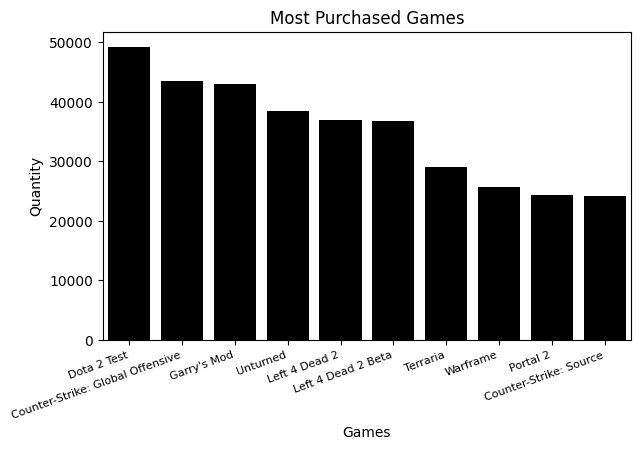

In [ ]:
# We plot the most purchased games
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(Items["item_name"].value_counts()[:10],color="black")
plt.xticks(rotation = 20, ha = 'right' , fontsize = 8)
plt.xlabel("Games")
plt.ylabel("Quantity")
plt.title("Most Purchased Games")

In [ ]:
# We calculate the time spending by users

# For first we copy 'user_id' and 'playtime_forever' columns in a new variable
time_spend = Items[['user_id', 'playtime_forever']].copy()

# We convert the new variable in a dataframe
time_spend = pd.DataFrame(time_spend)

# We create columns to calculate hours and days spend for playing by users

# Hours Spending by users:
time_spend['Hours_Spend_Playing'] = time_spend['playtime_forever'] / 60

# Days spending by users:
time_spend['Days_Spend_Playing'] = time_spend['Hours_Spend_Playing'] / 24

# We sort it
time_spend = time_spend.sort_values('Hours_Spend_Playing', ascending=False)


In [ ]:
time_spend

# We realize that Cydran is the user with most spending time by playing

,user_id,playtime_forever,Hours_Spend_Playing,Days_Spend_Playing
586999,Cydran,642773.0,10712.883333,446.370139
2495758,EucHellscythe,635295.0,10588.250000,441.177083
4069519,76561198018891278,632452.0,10540.866667,439.202778
1493518,poopinya,613411.0,10223.516667,425.979861
1834792,76561198048365774,600068.0,10001.133333,416.713889
...,...,...,...,...
3845016,irmikeee,0.0,0.000000,0.000000
3845015,irmikeee,0.0,0.000000,0.000000
3845014,irmikeee,0.0,0.000000,0.000000
1923472,thugnificent,0.0,0.000000,0.000000
